In [2]:
vehicle age,is esc, is_tpms, is adjustable steering, steering type, is parking camera, rare breaks type, turning radius, length and width, is fron fog lights,  rare window wiper, 



SyntaxError: invalid syntax (3887949755.py, line 1)

In [45]:
import pandas as pd 
import matplotlib as plt
import seaborn as sns
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter
import numpy as np

In [46]:
dataset_path = kagglehub.dataset_download("litvinenko630/insurance-claims")
df = pd.read_csv(f"{dataset_path}/Insurance claims data.csv")

In [47]:
safety_features = df[["vehicle_age", "is_esc","is_adjustable_steering","is_tpms","is_parking_sensors","is_parking_camera","rear_brakes_type","steering_type","turning_radius","length","width","is_front_fog_lights","is_rear_window_wiper","is_rear_window_washer","is_rear_window_defogger","is_brake_assist","is_power_door_locks","is_central_locking","is_power_steering","is_driver_seat_height_adjustable","is_day_night_rear_view_mirror","is_ecw","is_speed_alert","ncap_rating","claim_status"]]
safety_features.head()

,vehicle_age,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,steering_type,turning_radius,length,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,1.2,Yes,Yes,Yes,Yes,Yes,Disc,Power,5.2,4300,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,1.8,No,Yes,No,Yes,Yes,Drum,Electric,4.9,3995,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,0.2,Yes,Yes,Yes,Yes,Yes,Disc,Power,5.2,4300,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,0.4,No,No,No,Yes,No,Drum,Power,4.6,3445,...,No,No,No,Yes,No,No,No,Yes,0,0
4,1.0,No,Yes,No,Yes,No,Drum,Electric,5.0,3990,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [48]:
cat = safety_features.select_dtypes(exclude= "number")
num = safety_features.select_dtypes(include= "number")

In [49]:


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

## I want to convert al categorical data to a more numerical coded data, because when we try to analize all of the columns to get an instight, it will be more comfortable working with all the data converted into numerical

In [50]:
from sklearn.preprocessing import LabelEncoder

# Simple encoding - same number of columns as original
safety_features_encoded = safety_features.copy()

# Apply LabelEncoder to categorical columns only
for col in cat.columns:
    le = LabelEncoder()
    safety_features_encoded[col] = le.fit_transform(safety_features_encoded[col])



In [51]:
safety_features_encoded.corr()

,vehicle_age,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,steering_type,turning_radius,length,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
vehicle_age,1.000000,0.225892,0.370190,0.194777,-0.023809,0.228212,-0.194777,-0.212720,0.332716,0.383177,...,0.350568,0.435211,0.435211,-0.018853,0.357716,0.194007,0.435211,-0.046551,0.348853,-0.028172
is_esc,0.225892,1.000000,0.517896,0.828793,0.139016,0.845105,-0.828793,0.276548,0.788425,0.816941,...,0.613068,0.417517,0.417517,0.098215,0.569611,-0.225575,0.417517,-0.116688,0.361063,0.002995
is_adjustable_steering,0.370190,0.517896,1.000000,0.451872,0.254973,0.449247,-0.451872,-0.476923,0.674918,0.821108,...,0.863840,0.765782,0.765782,0.180139,0.931436,0.460479,0.765782,0.097987,0.645792,0.013917
is_tpms,0.194777,0.828793,0.451872,1.000000,0.115215,0.700417,-1.000000,0.480278,0.853530,0.809393,...,0.508107,0.346035,0.346035,0.081400,0.472089,-0.439321,0.346035,0.044278,0.500452,0.000703
is_parking_sensors,-0.023809,0.139016,0.254973,0.115215,1.000000,-0.256603,-0.115215,0.245090,-0.132524,0.078813,...,0.226754,-0.126773,-0.126773,-0.029821,0.244054,-0.262257,-0.126773,-0.016221,-0.035492,0.008419
is_parking_camera,0.228212,0.845105,0.449247,0.700417,-0.256603,1.000000,-0.700417,0.075838,0.818859,0.779637,...,0.409982,0.494042,0.494042,0.116216,0.505523,-0.014231,0.494042,-0.098614,0.477036,-0.000871
rear_brakes_type,-0.194777,-0.828793,-0.451872,-1.000000,-0.115215,-0.700417,1.000000,-0.480278,-0.853530,-0.809393,...,-0.508107,-0.346035,-0.346035,-0.081400,-0.472089,0.439321,-0.346035,-0.044278,-0.500452,-0.000703
steering_type,-0.212720,0.276548,-0.476923,0.480278,0.245090,0.075838,-0.480278,1.000000,0.049670,-0.070719,...,-0.305731,-0.481143,-0.481143,0.024423,-0.396132,-0.934540,-0.481143,-0.067620,-0.196605,-0.009608
turning_radius,0.332716,0.788425,0.674918,0.853530,-0.132524,0.818859,-0.853530,0.049670,1.000000,0.944899,...,0.625850,0.704485,0.704485,0.224604,0.647198,-0.053278,0.704485,-0.085550,0.779302,0.002724
length,0.383177,0.816941,0.821108,0.809393,0.078813,0.779637,-0.809393,-0.070719,0.944899,1.000000,...,0.753731,0.769225,0.769225,0.081780,0.795205,0.057888,0.769225,-0.036131,0.767519,0.006495


## I want to add weigths to all the columns, to  see which of them are more relevant 

In [52]:

# Basic statistics
print("\nClaim Rate Overall:", df['claim_status'].mean())



Claim Rate Overall: 0.06396777717094485


In [53]:
binary_features = ['is_esc', 'is_tpms', 'is_brake_assist', 'is_parking_sensors', 
                   'is_parking_camera', 'is_adjustable_steering', 'is_ecw', 
                   'is_speed_alert', 'is_front_fog_lights', 'is_rear_window_wiper',
                   'is_rear_window_washer', 'is_rear_window_defogger', 
                   'is_power_door_locks', 'is_central_locking', 'is_power_steering',
                   'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror']

for col in binary_features:
    df[col + '_binary'] = (df[col] == 'Yes').astype(int)

In [54]:
from scipy import stats

# Get only numeric columns from safety_features

numeric_features = safety_features_encoded.select_dtypes(include='number').columns.tolist()

# Remove claim_status if it's in the list
if 'claim_status' in numeric_features:
    numeric_features.remove('claim_status')


correlations = {}
statistical_relevant = {}
for feature in numeric_features:
    if feature in safety_features_encoded.columns:
        corr, p_val = stats.pearsonr(safety_features_encoded[feature], safety_features_encoded['claim_status'])
        correlations[feature] = {'correlation': abs(corr), 'p_value': p_val}

        # save statistical relevant columns (p-value < 0.05)

        if p_val < 0.05:  
            statistical_relevant[feature] = abs(corr)

# Create weights series

weights = pd.Series(correlations)

print(weights)

vehicle_age                         {'correlation': 0.028172125929021123, 'p_value...
is_esc                              {'correlation': 0.0029948348832526932, 'p_valu...
is_adjustable_steering              {'correlation': 0.013916612183608923, 'p_value...
is_tpms                             {'correlation': 0.0007029561818993616, 'p_valu...
is_parking_sensors                  {'correlation': 0.008419358859161922, 'p_value...
is_parking_camera                   {'correlation': 0.0008712615419067321, 'p_valu...
rear_brakes_type                    {'correlation': 0.0007029561818993751, 'p_valu...
steering_type                       {'correlation': 0.009608029479370212, 'p_value...
turning_radius                      {'correlation': 0.0027242229291589834, 'p_valu...
length                              {'correlation': 0.006494537973319065, 'p_value...
width                               {'correlation': 0.009947051749073389, 'p_value...
is_front_fog_lights                 {'correlation': 0.

## i'm ceating a chart, that displays each feature with it's weight 

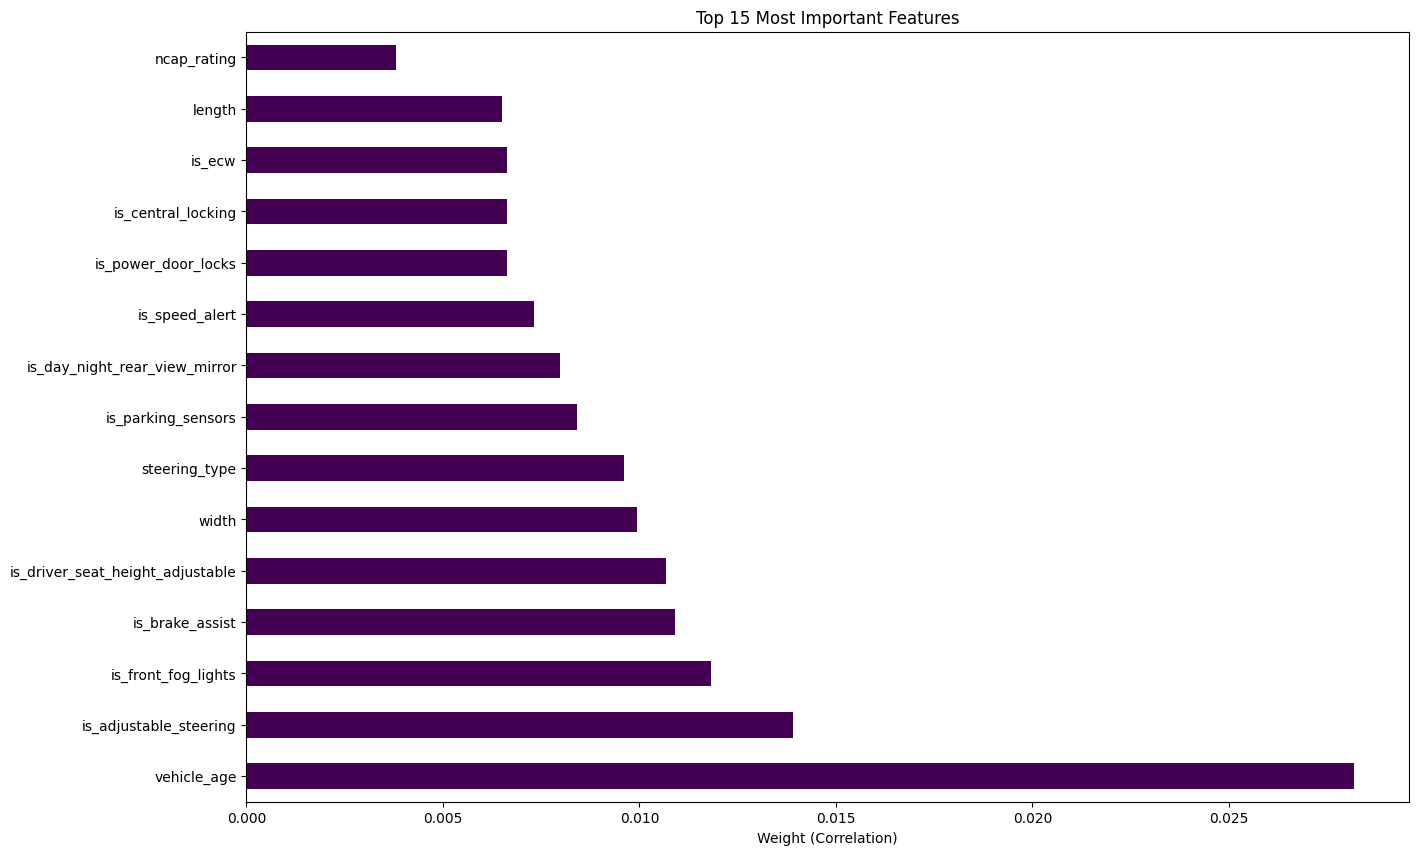

In [55]:
import matplotlib.pyplot as plt

# Extract correlation values from the weights dictionary
correlation_weights = weights.apply(lambda x: x['correlation'])

plt.figure(figsize=(15,10))
top_weights = correlation_weights.nlargest(15)
top_weights.plot(kind='barh', colormap='viridis')
plt.title('Top 15 Most Important Features')
plt.xlabel('Weight (Correlation)')
plt.show()


In [56]:
# Separate features (X) and target (y)
# Remove ID columns and claim_status to create X

columns_to_remove = ['policy_id', 'claim_status']
X = df.drop(columns=columns_to_remove)
y = df['claim_status']

In [57]:
# Separate categorical and numerical features from X
cat_all = X.select_dtypes(exclude="number")
num_all = X.select_dtypes(include="number")


In [58]:
display(cat_all)

,region_code,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,is_tpms,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,C8,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
1,C2,C1,M9,Diesel,200Nm@1750rpm,97.89bhp@3600rpm,i-DTEC,No,Yes,No,...,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,C8,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
3,C10,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
4,C13,B2,M5,Diesel,200Nm@3000rpm,88.77bhp@4000rpm,1.5 Turbocharged Revotorq,No,Yes,No,...,No,No,No,Yes,Yes,Yes,No,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,C5,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,No,Yes,No,...,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
58588,C3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
58589,C8,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,No,Yes,No,...,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
58590,C8,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,No,Yes,No,...,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [59]:
from sklearn.preprocessing import LabelEncoder

# This will give you the SAME number of columns as original
for col in cat_all.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [60]:
X

,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,max_power,...,is_speed_alert_binary,is_front_fog_lights_binary,is_rear_window_wiper_binary,is_rear_window_washer_binary,is_rear_window_defogger_binary,is_power_door_locks_binary,is_central_locking_binary,is_power_steering_binary,is_driver_seat_height_adjustable_binary,is_day_night_rear_view_mirror_binary
0,9.3,1.2,41,20,8794,4,5,1,4,0,...,1,1,1,1,1,1,1,1,1,0
1,8.2,1.8,35,11,27003,3,10,1,2,8,...,1,1,0,0,1,1,1,1,1,1
2,9.5,0.2,44,20,8794,4,5,1,4,0,...,1,1,1,1,1,1,1,1,1,0
3,5.2,0.4,44,1,73430,0,0,0,5,2,...,1,0,0,0,0,0,0,1,0,0
4,10.1,1.0,56,4,5410,2,6,1,3,7,...,1,0,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,10.6,2.6,48,17,34738,2,7,2,0,6,...,1,1,0,0,0,1,1,1,1,1
58588,2.3,2.2,37,15,4076,4,5,1,4,0,...,1,1,1,1,1,1,1,1,1,0
58589,6.6,2.2,35,20,8794,2,7,2,0,6,...,1,1,0,0,0,1,1,1,1,1
58590,4.1,3.6,44,20,8794,2,7,2,0,6,...,1,1,0,0,0,1,1,1,1,1
